In [857]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import json
import matplotlib
import scipy

matplotlib.rcParams['figure.figsize'] = [10, 5]

In [858]:
with open("../export/image_catalogue.json") as ic_file:
    image_catalog = json.load(ic_file)
    types_map = [v["type"] for k, v in sorted(image_catalog.items()) if k.isnumeric()]

In [859]:
rating_files = glob.glob("../export/*_rating.csv")
rating_files.sort()
rating_files[-1]

'../export/20221222-085950_rating.csv'

In [860]:
questions = ["Fictional/Real", "Human-made/Human-like", "Eerie/Ordinary", "Unsettling/Plain", "Creepy/Dull",
             "Hair-raising/Unemotional", "Hostile/Friendly", "Grumpy/Cheerful", "Cold-hearted/Warm-hearted"]

In [861]:
ratings = pd.read_csv(rating_files[-1], index_col=["index"],
                      names=["index", "timestamp", "img"] + questions + ["uid"])
ratings = ratings.reset_index().drop(["index"], axis=1)
ratings["type"] = [types_map[img - 1] for img in ratings["img"]]

ratings["Fictional/Real"] -= 4
ratings["Human-made/Human-like"] -= 4
ratings["Eerie/Ordinary"] = 7 - ratings["Eerie/Ordinary"]
ratings["Unsettling/Plain"] = 7 - ratings["Unsettling/Plain"]
ratings["Creepy/Dull"] = 7 - ratings["Creepy/Dull"]
ratings["Hair-raising/Unemotional"] = 7 - ratings["Hair-raising/Unemotional"]
ratings["Hostile/Friendly"] -= 4
ratings["Grumpy/Cheerful"] -= 4
ratings["Cold-hearted/Warm-hearted"] -= 4

# Image Distribution

<AxesSubplot: >

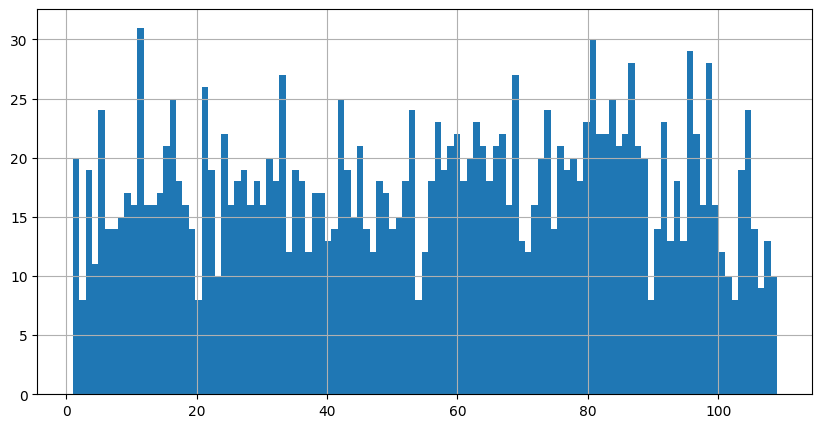

In [862]:
ratings["img"].hist(bins=max(ratings["img"]))

# Ratings Distribution

In [863]:
def analyse_columns(column, ratings):
    fig, axes = plt.subplots(1, 4)
    fig.suptitle(column, fontsize=16)
    ratings[column].hist(bins=max(ratings[column]), ax=axes[0])
    axes[0].set_title('all')
    ratings[ratings["type"] == "human"][column].hist(bins=1 + max(ratings[column]) - min(ratings[column]), ax=axes[1])
    axes[1].set_title('human')
    ratings[ratings["type"] == "semi-realistic"][column].hist(bins=1 + max(ratings[column]) - min(ratings[column]),
                                                              ax=axes[2])
    axes[2].set_title('semi-realistic')
    ratings[ratings["type"] == "animated_grey"][column].hist(bins=1 + max(ratings[column]) - min(ratings[column]),
                                                             ax=axes[3])
    axes[3].set_title('animated_grey')
    plt.show()
    f, f_p = scipy.stats.f_oneway(ratings[ratings["type"] == "human"][column],
                                  ratings[ratings["type"] == "semi-realistic"][column],
                                  ratings[ratings["type"] == "animated_grey"][column])
    u, u_p = scipy.stats.mannwhitneyu(ratings[ratings["type"] == "semi-realistic"][column],
                                      ratings[ratings["type"] == "animated_grey"][
                                          column])

    print(
        "All: {:.2f}, Human: {:.2f}, Semi Realistic: {:.2f}, Cartoon: {:.2f}, Anova p-value: {:.2f}, Mann–Whitney p-value: {:.2f} (semi vs cart)".format(
            ratings[column].mean(),
            ratings[ratings["type"] == "human"][column].mean(),
            ratings[ratings["type"] == "semi-realistic"][column].mean(),
            ratings[ratings["type"] == "animated_grey"][column].mean(), f_p, u_p))

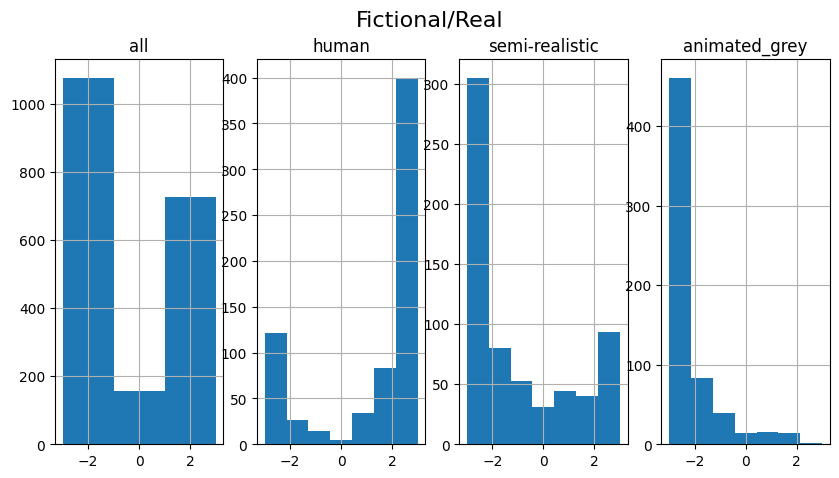

All: -0.66, Human: 1.42, Semi Realistic: -1.12, Cartoon: -2.45, Anova p-value: 0.00, Mann–Whitney p-value: 0.00 (semi vs cart)


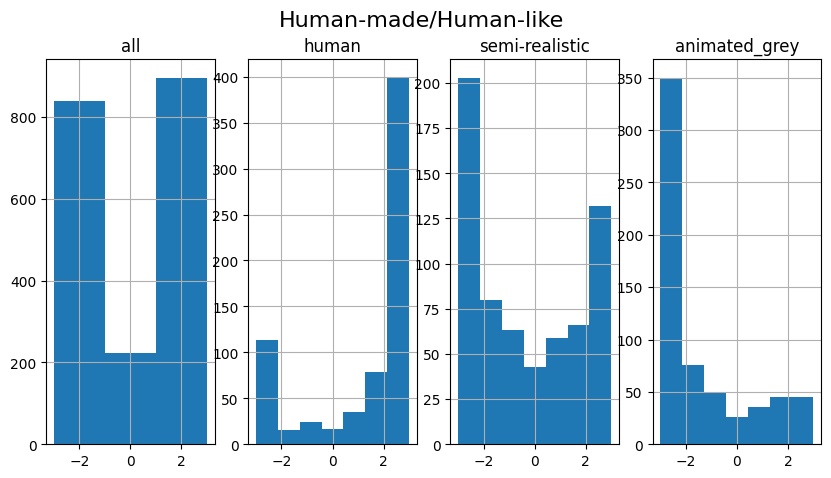

All: -0.12, Human: 1.45, Semi Realistic: -0.38, Cartoon: -1.58, Anova p-value: 0.00, Mann–Whitney p-value: 0.00 (semi vs cart)


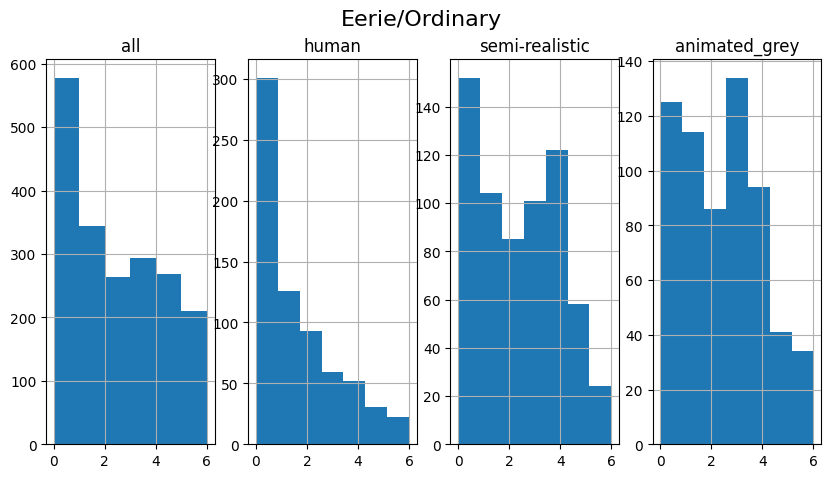

All: 2.02, Human: 1.44, Semi Realistic: 2.32, Cartoon: 2.35, Anova p-value: 0.00, Mann–Whitney p-value: 0.85 (semi vs cart)


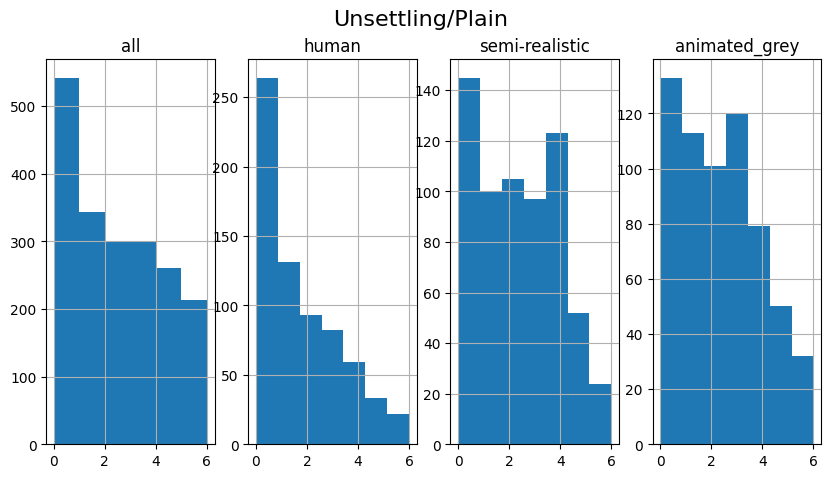

All: 2.06, Human: 1.60, Semi Realistic: 2.32, Cartoon: 2.28, Anova p-value: 0.00, Mann–Whitney p-value: 0.64 (semi vs cart)


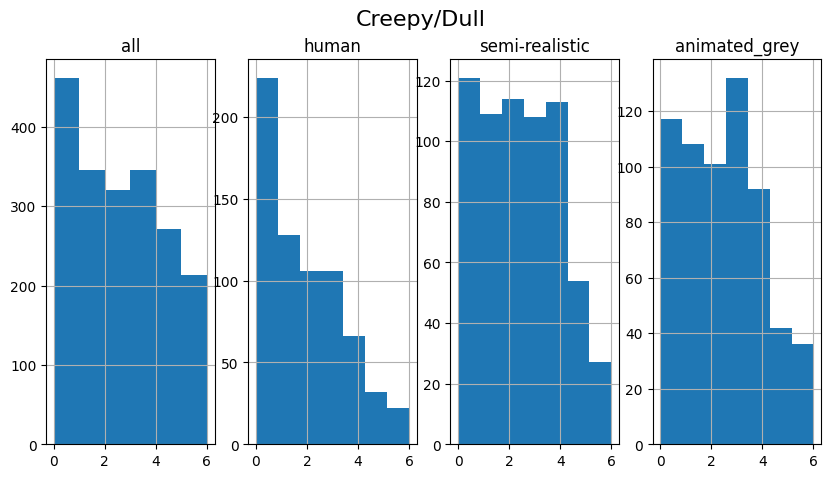

All: 2.18, Human: 1.77, Semi Realistic: 2.39, Cartoon: 2.39, Anova p-value: 0.00, Mann–Whitney p-value: 0.89 (semi vs cart)


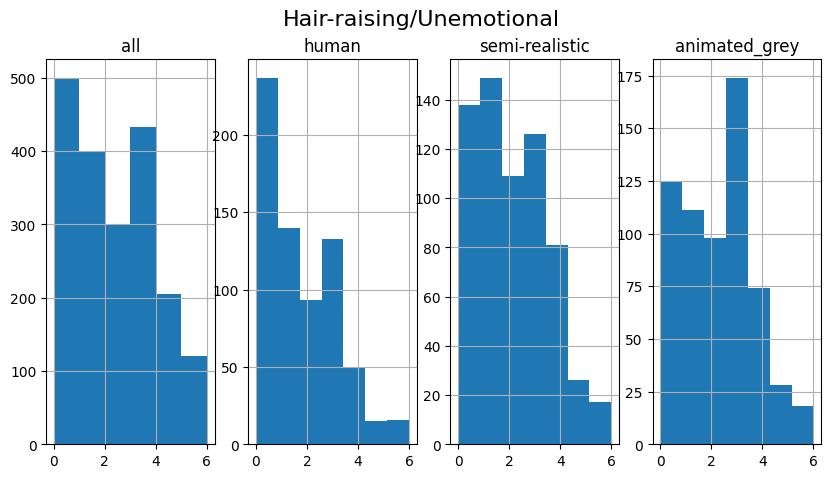

All: 1.93, Human: 1.60, Semi Realistic: 2.01, Cartoon: 2.19, Anova p-value: 0.00, Mann–Whitney p-value: 0.04 (semi vs cart)


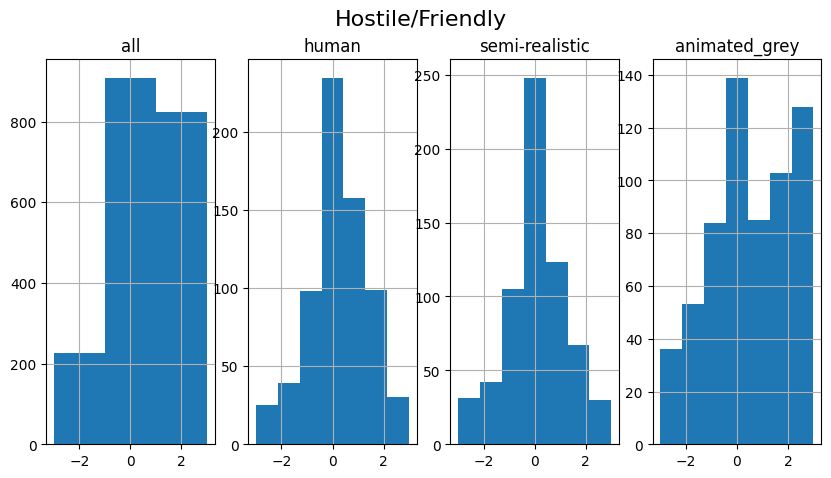

All: 0.33, Human: 0.29, Semi Realistic: 0.10, Cartoon: 0.60, Anova p-value: 0.00, Mann–Whitney p-value: 0.00 (semi vs cart)


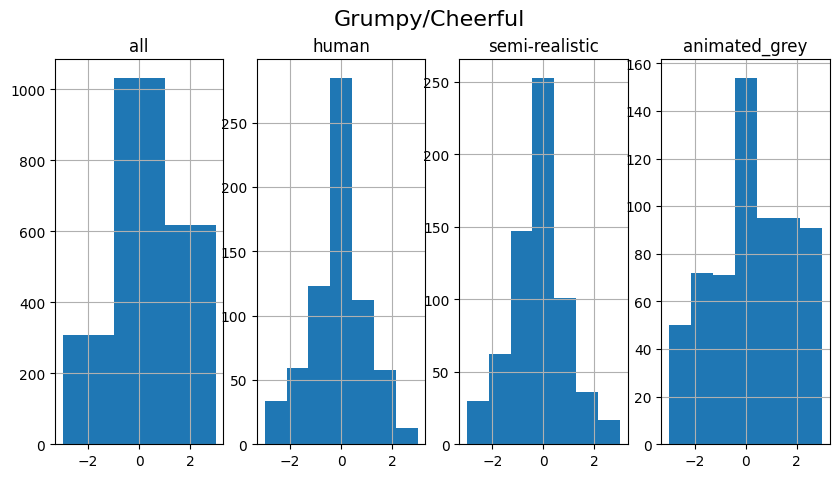

All: -0.01, Human: -0.11, Semi Realistic: -0.21, Cartoon: 0.31, Anova p-value: 0.00, Mann–Whitney p-value: 0.00 (semi vs cart)


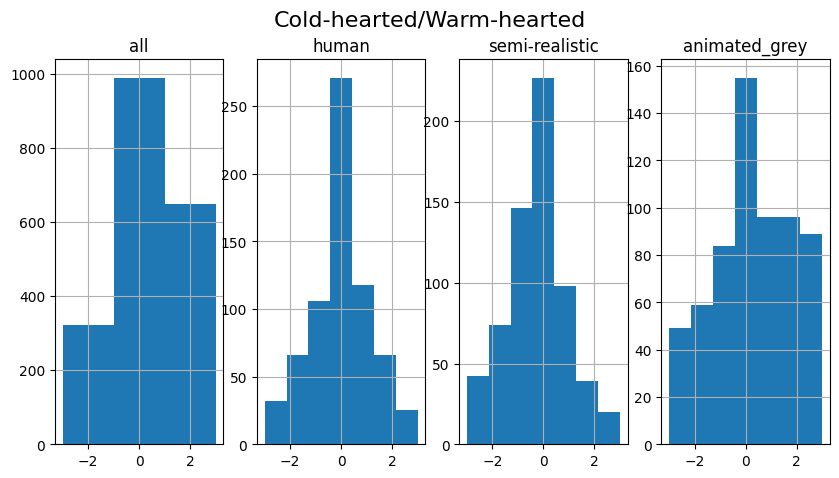

All: 0.01, Human: -0.01, Semi Realistic: -0.28, Cartoon: 0.33, Anova p-value: 0.00, Mann–Whitney p-value: 0.00 (semi vs cart)


In [864]:
for column in questions:
    analyse_columns(column, ratings)

# Exploratory Factor Analysis

In [865]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

items = ratings[questions]
chi_square_value, p_value = calculate_bartlett_sphericity(items)
print("Bartlett ’s test:")
print(chi_square_value, p_value)
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(items)
print("KMO:")
print(kmo_model)
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(items)
print("Loadings:")
print(fa.loadings_)

Bartlett ’s test:
13468.551497284134 0.0
KMO:
0.8142864887919299
Loadings:
[[-0.19554257 -0.0787083   0.8578485 ]
 [-0.13219039 -0.04891438  0.88567483]
 [ 0.80068088 -0.196382   -0.24247427]
 [ 0.88430854 -0.24758072 -0.13887176]
 [ 0.87244435 -0.25877587 -0.08932709]
 [ 0.7453284  -0.17091441 -0.0949381 ]
 [-0.32265901  0.85057518 -0.04827061]
 [-0.15652292  0.8451334  -0.06440396]
 [-0.23681223  0.86383468 -0.04099755]]


# Factors distributions

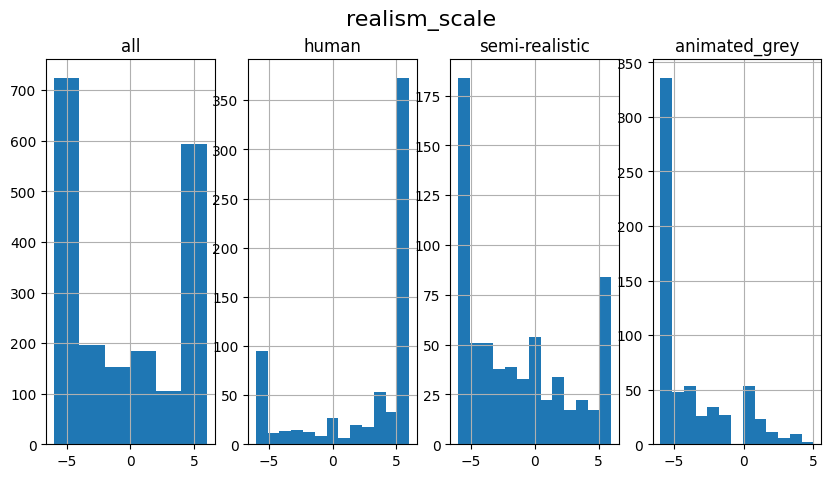

All: -0.79, Human: 2.87, Semi Realistic: -1.50, Cartoon: -4.03, Anova p-value: 0.00, Mann–Whitney p-value: 0.00 (semi vs cart)


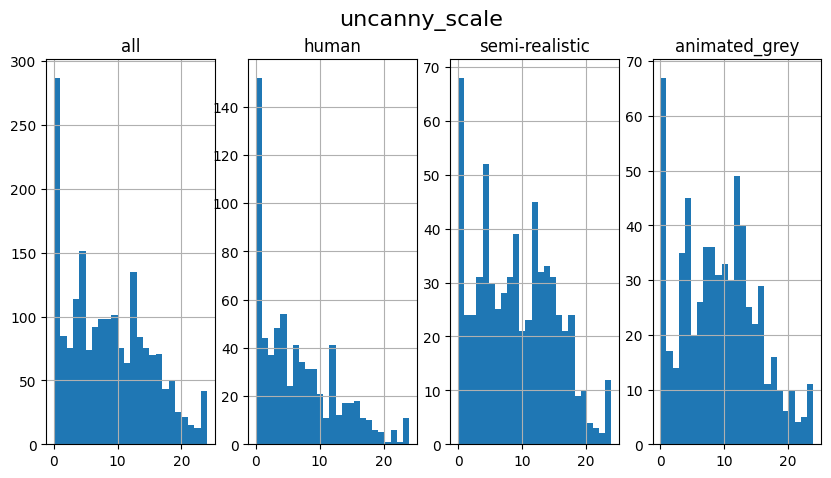

All: 8.18, Human: 6.42, Semi Realistic: 9.04, Cartoon: 9.20, Anova p-value: 0.00, Mann–Whitney p-value: 0.72 (semi vs cart)


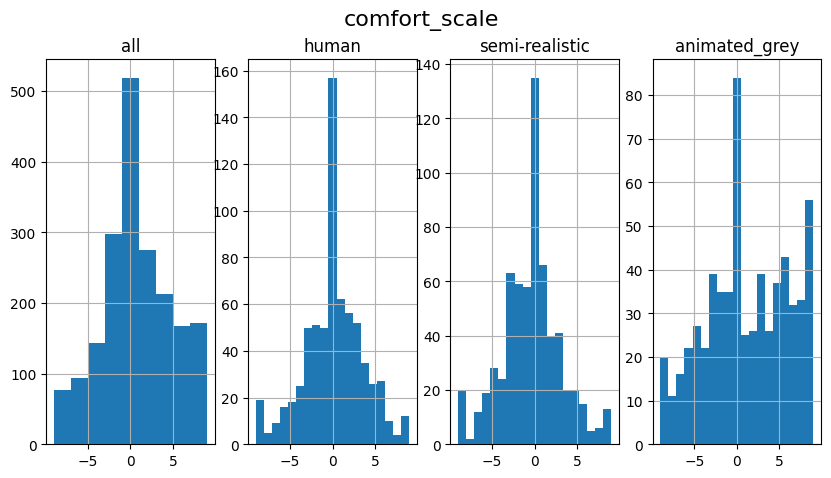

All: 0.32, Human: 0.16, Semi Realistic: -0.40, Cartoon: 1.24, Anova p-value: 0.00, Mann–Whitney p-value: 0.00 (semi vs cart)


In [866]:
ratings["realism_scale"] = ratings["Fictional/Real"] + ratings["Human-made/Human-like"]
ratings["uncanny_scale"] = ratings["Eerie/Ordinary"] + ratings["Unsettling/Plain"] + ratings[
    "Creepy/Dull"] + ratings["Hair-raising/Unemotional"]
ratings["comfort_scale"] = ratings["Hostile/Friendly"] + ratings["Grumpy/Cheerful"] + ratings[
    "Cold-hearted/Warm-hearted"]

for column in ["realism_scale", "uncanny_scale", "comfort_scale"]:
    analyse_columns(column, ratings)

/var/folders/t7/m4fy3kb90jb91658d6n8mc940000gn/T/ipykernel_72167/2683215456.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratings.groupby("realism_scale").mean()["uncanny_scale"].plot.bar()


Text(0, 0.5, 'uncanny_scale')

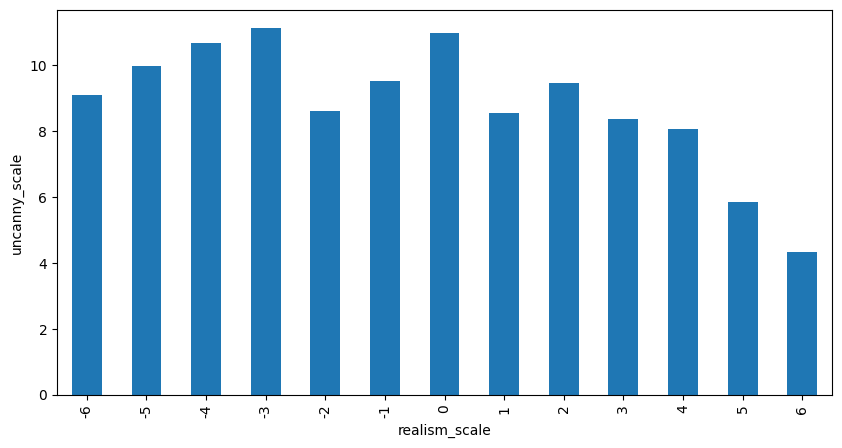

In [867]:
ratings.groupby("realism_scale").mean()["uncanny_scale"].plot.bar()
plt.ylabel("uncanny_scale")

# Best Images for the EEG Experiment

In [868]:
cohort_size = 20
best_images = pd.concat([
ratings[ratings["type"] == "human"].groupby("img").mean().sort_values(by="uncanny_scale", ascending=True).reset_index()["img"][:cohort_size],
ratings[ratings["type"] == "semi-realistic"].groupby("img").mean().sort_values(by="uncanny_scale", ascending=False).reset_index()["img"][:cohort_size],
ratings[ratings["type"] == "animated_grey"].groupby("img").mean().sort_values(by="uncanny_scale", ascending=True).reset_index()["img"][:cohort_size]
    ]).to_list()
top_ratings = ratings[ratings["img"].isin(best_images)]

/var/folders/t7/m4fy3kb90jb91658d6n8mc940000gn/T/ipykernel_72167/1971320400.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratings[ratings["type"] == "human"].groupby("img").mean().sort_values(by="uncanny_scale", ascending=True).reset_index()["img"][:cohort_size],
/var/folders/t7/m4fy3kb90jb91658d6n8mc940000gn/T/ipykernel_72167/1971320400.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratings[ratings["type"] == "semi-realistic"].groupby("img").mean().sort_values(by="uncanny_scale", ascending=False).reset_index()["img"][:cohort_size],
/var/folders/t7/m4fy3kb90jb91658d6n8mc940000gn/T/ipykernel_72167

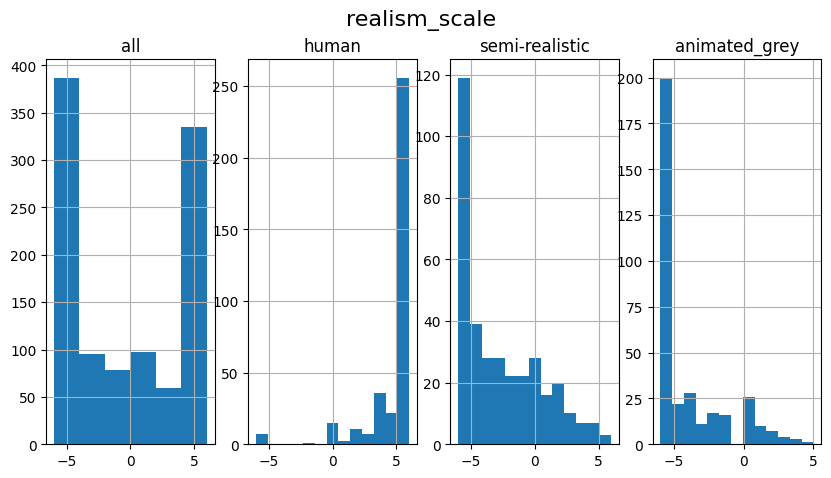

All: -0.63, Human: 5.02, Semi Realistic: -2.88, Cartoon: -4.21, Anova p-value: 0.00, Mann–Whitney p-value: 0.00 (semi vs cart)


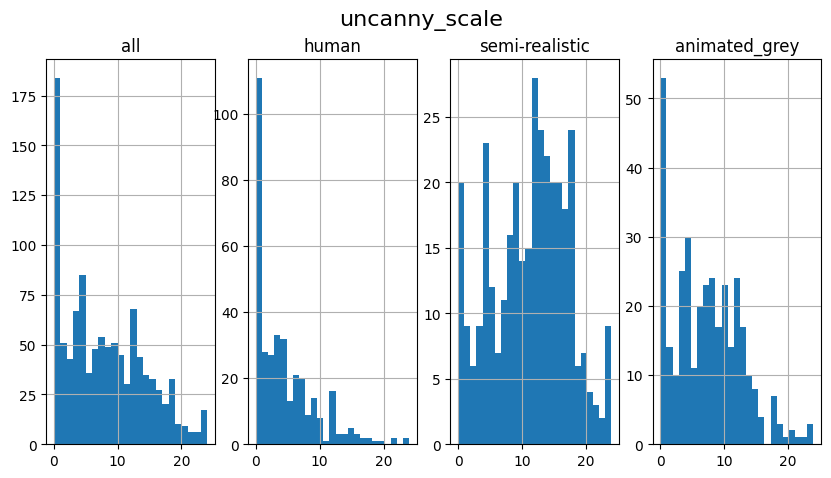

All: 7.54, Human: 4.27, Semi Realistic: 11.21, Cartoon: 7.21, Anova p-value: 0.00, Mann–Whitney p-value: 0.00 (semi vs cart)


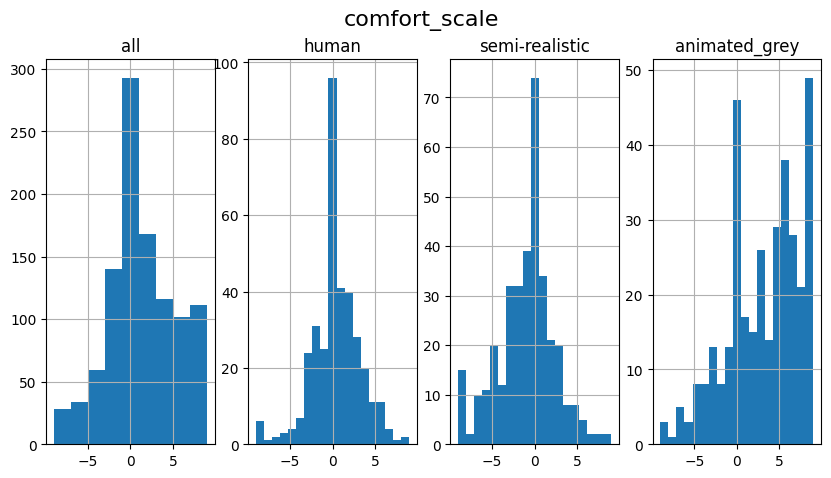

All: 0.90, Human: 0.45, Semi Realistic: -1.00, Cartoon: 3.28, Anova p-value: 0.00, Mann–Whitney p-value: 0.00 (semi vs cart)


In [869]:
for column in ["realism_scale", "uncanny_scale", "comfort_scale"]:
    analyse_columns(column, top_ratings)